In [1]:
# Clean Slate for clean thoughts :)
# Stuff
import numpy as np
import cvxpy as cvx
from scipy import sparse
from scipy import signal
from imTools import *
from Taylor08 import *
from convexHullPlot import *
import time
from MuliScaleRep import *
from PIL import ImageFilter

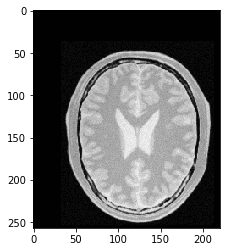

In [77]:
basePath = 'images/BrainProtonDensitySlice.png'
targetPath = 'images/BrainProtonDensitySliceShifted13x17y.png'
# targetPath = 'images/DeformedBrainPD.png'
# basePath = 'images/konaResize.png'
# targetPath = 'images/konaTransform.png'
base = readImage(basePath)
target = readImage(targetPath)
# target = firstOrderDeformImage(base, [13, 0, 0, 17, 0, 0])
# target = secondOrderDeformImage(base, [10, -0.05, -0.02, 0,0,0, -5, 0, 0, -0.004,0,0.0006])

(m, n, _) = base.copy().shape
plt.imshow(target)

In [78]:
# Downsample by a factor k:
k = 4

def downSample(im, k):
    (rows, cols, _) = im.shape
    dsRows = int(np.floor(rows/k))
    dsCols = int(np.floor(cols/k))
    
    pilIm = Image.fromarray(np.uint8(im))
    
    return np.array(pilIm.resize((dsCols, dsRows), resample=Image.BILINEAR))

base = downSample(base, k)
target = downSample(target, k)
# base = downSample('images/konaResize.png', k)
# target = downSample('images/konaTransform.png', k)
# target = np.array(im.resize((n, m)))

In [ ]:
# Apply Median Filter

# baseMedian = (medianFilter(base, 5)).astype(int)
# targetMedian = (medianFilter(target, 5)).astype(int)

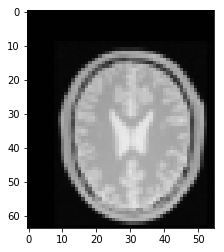

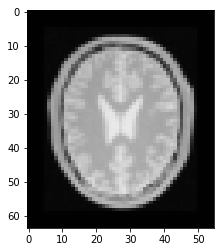

In [79]:
plt.imshow(target)
plt.figure()
plt.imshow(base)

Getting Coefficients...


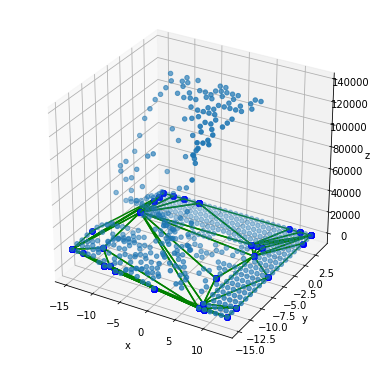

Done. Time elapsed: 35.39644002914429  


Formatting Matrices...
Done. Total Time Elapsed:  37.33504605293274 


Current gap: 251028.0 


Current gap: 8367.6 


Current gap: 278.92 


Current gap: 9.297333333333333 


Current gap: 0.30991111111111114 


Current gap: 0.01033037037037037 


Current gap: 0.00034434567901234567 


76.93376994132996


In [80]:
startTime = time.time()
(p, z) = Taylor08(target, base, 'firstOrder', 15, [])
print(time.time() - startTime)

In [90]:
(m, n, _) = base.copy().shape

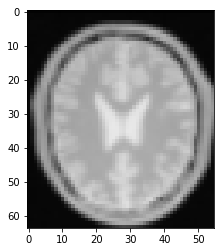

In [87]:
plt.figure()
newBase = firstOrderDeformImage(base, p)
plt.imshow(newBase)

Getting Coefficients...


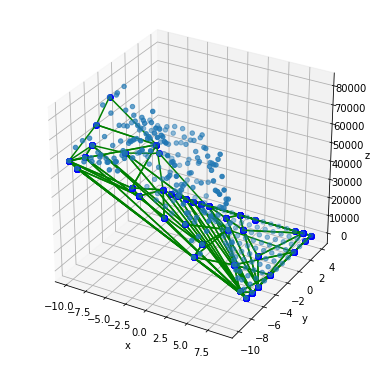

Done. Time elapsed: 20.177767992019653  


Formatting Matrices...
Done. Total Time Elapsed:  21.67913293838501 




/Users/brknight/Documents/GitHub/masters-thesis/ConvexRegistration/Taylor08.py:465: RuntimeWarning: divide by zero encountered in power
  dxLB = sparse.diags(sxLB**(-2))
/Users/brknight/Documents/GitHub/masters-thesis/ConvexRegistration/Taylor08.py:467: RuntimeWarning: divide by zero encountered in power
  dyLB = sparse.diags(syLB**(-2))
/Users/brknight/Documents/GitHub/masters-thesis/ConvexRegistration/Taylor08.py:475: RuntimeWarning: divide by zero encountered in reciprocal
  gpx =  C.T @ ((Ax.T @ s**(-1)) - sxLB**(-1) + sxUB**(-1))
/Users/brknight/Documents/GitHub/masters-thesis/ConvexRegistration/Taylor08.py:475: RuntimeWarning: invalid value encountered in matmul
  gpx =  C.T @ ((Ax.T @ s**(-1)) - sxLB**(-1) + sxUB**(-1))
/Users/brknight/Documents/GitHub/masters-thesis/ConvexRegistration/Taylor08.py:476: RuntimeWarning: divide by zero encountered in reciprocal
  gpy =  C.T @ ((Ay.T @ s**(-1)) - syLB**(-1) + syUB**(-1))
/Users/brknight/Documents/GitHub/masters-thesis/ConvexRegistra

ERROR: MAXITERS reached.

Current gap: 209193.0 




TypeError: object of type 'int' has no len()

In [91]:
startTime = time.time()
(p2, z2) = Taylor08(target, newBase, 'firstOrder', 10, (np.zeros(m*n), 20*np.ones(m*n), 0*np.zeros(m*n), 20*np.ones(m*n)))
print(time.time() - startTime)

In [ ]:
p2

In [ ]:
# plt.imshow(firstOrderDeformImage(target, 2*p + p2))
newBase2 = firstOrderDeformImage(newBase, p2)
plt.imshow(newBase2)
plt.figure()
plt.imshow(target)

In [ ]:
startTime = time.time()
(p3, z3) = Taylor08(target, newBase2, 'firstOrder', 3, -1*np.ones(m*n), 1*np.ones(m*n), -1*np.ones(m*n), 1*np.ones(m*n))
print(time.time() - startTime)

In [ ]:
p3

In [ ]:
plt.imshow(firstOrderDeformImage(base, p3 + 2 * (p2 + 2*p)))
p3 + 2 * (p2 + 2*p)

In [ ]:
p3 + 2 * p2 + 4 * p

In [ ]:
(p2, z2) = TaylorNewtonStep2((Ax, Ay, Iz, b, C), p, z, 5*np.ones(m*n), 5*np.ones(m*n), 5*np.ones(m*n), 5*np.ones(m*n), 50)

In [ ]:
max(z2)

In [ ]:
# Convex Lower Hull Plot Example
window = 8
plt.imshow(target)
(x,y) = (0,0)
errorSurface = []
for i in range(-window, window):
    for j in range(-window, window):

        if ((x + i) < m and (x + i) >= 0 and (y+j) < n and (y+j) >=0):
            error = np.linalg.norm(target[x,y] - base[x + i, y + j], 3) ** 2
            print(error)
            errorSurface.append([x + i, y + j, error])

errorSurface = np.array(errorSurface)
# hull = ConvexHull(points = errorSurface, qhull_options='QJ')
# hull = ConvexHull(points = errorSurface)

plotLowerHull(errorSurface, 1)

In [ ]:
(Ax, Ay, Iz, b, C) = getConstraintCoeffs(target, base, 5, 'secondOrder')

In [ ]:
# cvx for gaussian

(M, N, _) = base.shape
z = cvx.Variable(M*N)
px = cvx.Variable(19)
py = cvx.Variable(19)
C2 = []
kernels = getKernels((M,N), 4)
for x in range(M):
    for y in range(N):
        C2.append(gaussianD((x,y), kernels, 10))
C2 = np.array(C2)
objective = cvx.Minimize(np.ones(M*N).T @ z)
# constraints = [Ax @ C2 @ px + Ay @ C2 @ py - Iz @ z - b <=0, C2 @ px <= 40 * np.ones(m*n), C2 @ px >= -40 * np.ones(m*n), C2 @ py <= 40 * np.ones(m*n), C2 @ py >= -40 * np.ones(m*n)]
constraints = [Ax @ C2 @ py + Ay @ C2 @ px - Iz @ z - b <=0]

prob = cvx.Problem(objective, constraints)

result = prob.solve(solver=cvx.ECOS)

im = gaussianDeformImage(base, 10, 4, px.value, py.value)
plt.imshow(im)

In [ ]:
im = gaussianDeformImage(base, 10, 4, px.value, py.value)
plt.imshow(im)

In [ ]:
(M, N, _) = base.shape
(Ax, Ay, Iz, b, C) = getConstraintCoeffs(target, base, 15, 'secondOrder')
z = cvx.Variable(M*N)
px = cvx.Variable(6)
py = cvx.Variable(6)

objective = cvx.Minimize(np.ones(M*N).T @ z)
# constraints = [Ax @ C @ px + Ay @ C @ py - Iz @ z - b <=0, C @ px <= 40 * np.ones(M*N), C @ px >= 0 * np.ones(M*N), C @ py <= 40 * np.ones(M*N), C @ py >= 0 * np.ones(M*N)]
constraints = [Ax @ C @ py + Ay @ C @ px - Iz @ z - b <=0]

prob = cvx.Problem(objective, constraints)

result = prob.solve(solver=cvx.ECOS)

im = secondOrderDeformImage(base, np.concatenate((px.value, py.value), axis = 0))
plt.imshow(im)

In [ ]:
im2 = secondOrderDeformImage(base, np.concatenate((px.value, py.value), axis = 0))
plt.imshow(im2)

In [ ]:
plt.imshow(im)

In [ ]:
print(px.value)

In [ ]:
print(py.value)

In [65]:
def TaylorUnconstrained(target, base, window, deformType):
    startTime = time.time()

    (M, N, _) = base.shape
    
    if deformType == 'gaussian':
        L = 19
    elif deformType == 'firstOrder':
        L = 3
    elif deformType == 'secondOrder':
        L = 6
    else:# default to gaussian
        L = 19
        deformType = 'gaussian'
        
    (Ax, Ay, Iz, b, C) = getConstraintCoeffs(target, base, window, deformType)
    z = cvx.Variable(M*N)
    px = cvx.Variable(L)
    py = cvx.Variable(L)

    objective = cvx.Minimize(np.ones(M*N).T @ z)
    # constraints = [Ax @ C @ px + Ay @ C @ py - Iz @ z - b <=0, C @ px <= 20 * np.ones(M*N), C @ px >= -10 * np.ones(M*N), C @ py <= 20 * np.ones(M*N), C @ py >= -10 * np.ones(M*N)]
    constraints = [Ax @ C @ px + Ay @ C @ py - Iz @ z - b <=0]
    prob = cvx.Problem(objective, constraints)

    result = prob.solve(solver=cvx.ECOS)

#     im = firstOrderDeformImage(base, np.concatenate((px.value, py.value), axis=0))
#     plt.imshow(im)
    
    print('Time Elapsed: ', time.time() - startTime, '\n\n')

    return (np.concatenate((px.value, py.value), axis=0), z.value)

Getting Coefficients...


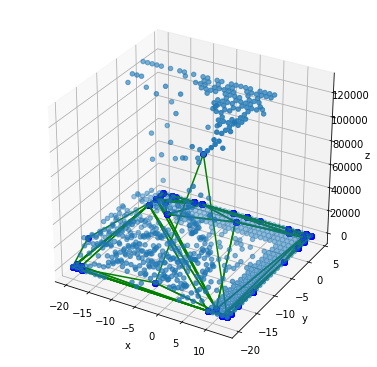

Done. Time elapsed: 56.62598991394043  


Formatting Matrices...
Done. Total Time Elapsed:  58.70096802711487 


Time Elapsed:  114.175283908844 




In [66]:
(p, z) = TaylorUnconstrained(target, base, 20, 'gaussian')

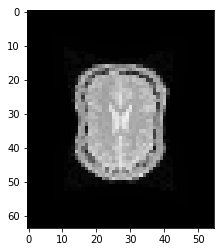

In [68]:
plt.imshow(gaussianDeformImage(base, 10, 4, -1*p))
testIm = gaussianDeformImage(base, 10, 4, p)

Getting Coefficients...


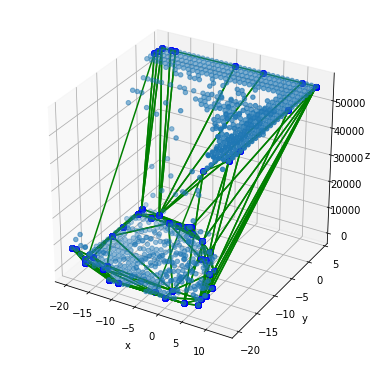

Done. Time elapsed: 60.29092288017273  


Formatting Matrices...
Done. Total Time Elapsed:  62.90868806838989 


Time Elapsed:  124.22745323181152 




In [24]:
(p1, z1) = TaylorUnconstrained(testIm, base, 20, 'gaussian')

In [29]:
from Metric import meanSquaresMetric3D

In [30]:
meanSquaresMetric3D(testIm, gaussianDeformImage(base, 10, 4, p1))

0.10170039058404111

In [43]:
testIm = gaussianDeformImage(base, 10, 4, 1/3*np.random.randn(38))

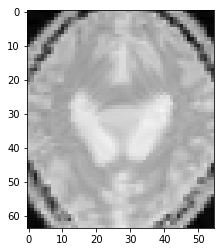

In [69]:
plt.imshow(testIm)

Getting Coefficients...


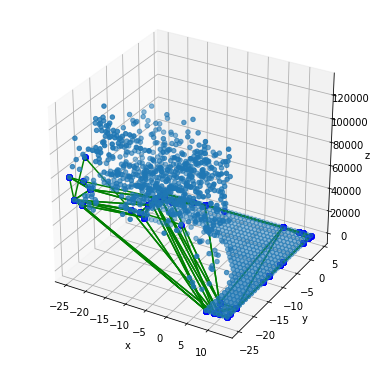

Done. Time elapsed: 82.52069520950317  


Formatting Matrices...
Done. Total Time Elapsed:  85.22300004959106 


Time Elapsed:  145.479394197464 




In [45]:
(p1, z1) = TaylorUnconstrained(testIm, base, 25, 'gaussian')

In [57]:
testIm2 = gaussianDeformImage(base, 10, 4, p1)

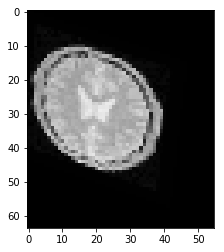

In [47]:
plt.imshow(testIm)

In [55]:
p1

array([-1.22492932e+01, -1.61841653e-02,  4.19280427e-01,  3.21937108e+01,
       -1.81681343e+01,  3.64822575e+01, -5.08843486e+01, -3.45122147e+01,
       -1.26957812e+01, -2.21024228e+00,  3.83972291e+01,  1.54470660e+01,
       -4.99635000e+01, -1.03045087e+00,  4.25070047e+01,  6.97854766e-01,
        4.91131719e+01, -1.97604433e-01, -4.61327478e+01, -4.59915371e+00,
        3.84256193e-01, -3.80505804e-02, -1.17882501e-01,  5.14340286e+00,
       -7.30463542e+01,  5.29825593e+01,  2.98335634e+01, -2.89368287e+01,
        7.72598411e+00, -3.61481917e+01, -2.22677333e+01,  3.09301507e+01,
        3.47061696e+00,  2.84829737e+01, -1.04930118e+01, -1.86826822e+01,
        6.70893273e+01, -4.25100509e+01])

Getting Coefficients...


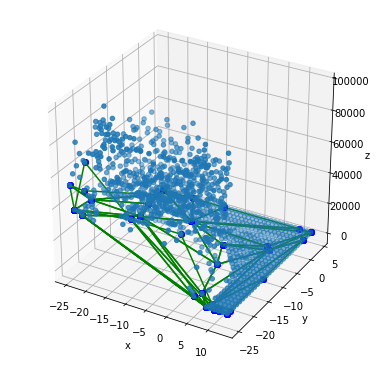

Done. Time elapsed: 83.69119167327881  


Formatting Matrices...
Done. Total Time Elapsed:  86.81317472457886 


Time Elapsed:  149.3090100288391 




In [58]:
(p2, z2) = TaylorUnconstrained(testIm2, base, 25, 'gaussian')

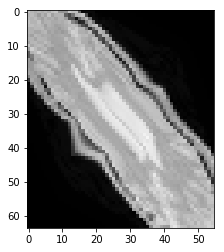

In [59]:
plt.imshow(gaussianDeformImage(base, 10, 4, p2))

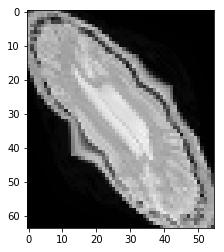

In [60]:
plt.imshow(testIm2)

Getting Coefficients...


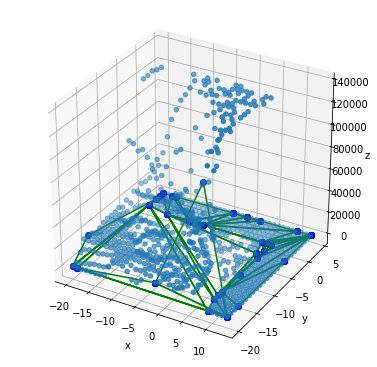

Done. Time elapsed: 56.48506712913513  


Formatting Matrices...
Done. Total Time Elapsed:  59.43287992477417 


ERROR: MAXITERS reached.

Current gap: 307337.0 




TypeError: object of type 'int' has no len()

In [94]:
startTime = time.time()
(p, z) = Taylor08(target, base, 'firstOrder', 20, [np.zeros(m*n), 20*np.ones(m*n), 0*np.zeros(m*n), 20*np.ones(m*n)])
print(time.time() - startTime)
print(time.time() - startTime)

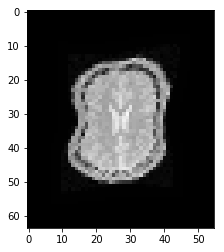

In [63]:
plt.imshow(gaussianDeformImage(base, 10, 4, -1*p))

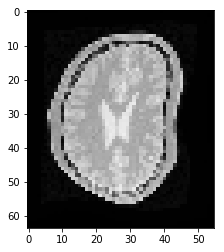

In [64]:
plt.imshow(target)